# Title: Exploratory Analysis of Wildfire Impact on Economic Indicators

---




This code notebook conducts an exploratory analysis centered around the impact of wildfires on various economic indicators. Leveraging diverse datasets encompassing air quality, economic factors, and wildfire occurrences in Williston, North Dakota, the analysis aims to uncover correlations and insights. Utilizing Python libraries such as Pandas, Matplotlib, Seaborn, and SciPy, this notebook employs data visualization, statistical analysis, and forecasting techniques to shed light on the relationship between wildfires, air quality, and economic trends. The findings contribute to understanding the dynamic interplay between environmental factors and economic stability.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

This code utilizes pandas' read_csv and read_excel functions to load data from CSV and Excel files, respectively. Each data file is loaded into a pandas DataFrame (e.g., wildfires_df, unemployment_df, income_df, aqi_smoke_df) for further analysis or manipulation.

In [ ]:
wildfires_df = pd.read_csv('aqi.csv')
unemployment_df = pd.read_excel('/content/Annual unemployment rate (all ages).xlsx')
income_df = pd.read_excel('/content/Median household income.xlsx')
aqi_smoke_df = pd.read_csv('/content/aqi_smoke_data.csv')

In [ ]:
wildfires_df.head()

,Unnamed: 0,Year,AQI
0,0,1981,0.194690
1,1,1982,7.764310
2,2,1983,13.492582
3,3,1984,14.084699
4,4,1985,16.915966


In [ ]:
unemployment_df.head()

,LocationType,Location,TimeFrame,DataFormat,Data
0,State,North Dakota,2000,Percent,0.030
1,State,North Dakota,2001,Percent,0.029
2,State,North Dakota,2002,Percent,0.037
3,State,North Dakota,2003,Percent,0.037
4,State,North Dakota,2004,Percent,0.034


In [ ]:
income_df.head()

,LocationType,Location,TimeFrame,DataFormat,Data
0,State,North Dakota,1989,Currency,23910.0
1,State,North Dakota,1993,Currency,27329.0
2,State,North Dakota,1995,Currency,29321.0
3,State,North Dakota,1996,Currency,30798.0
4,State,North Dakota,1997,Currency,31764.0


In [ ]:
aqi_smoke_df.head()

,Fire_Year,smoke_estimate,AQI
0,1981,20.390651,0.194690
1,1982,15.568126,7.764310
2,1983,26.800906,13.492582
3,1984,26.693225,14.084699
4,1985,21.245191,16.915966


This Python code snippet demonstrates the process of merging two datasets based on common columns, cleaning the merged data by handling missing and infinite values, and computing the correlation between wildfires (represented by Air Quality Index - AQI) and income-related data. It utilizes pandas for data manipulation, merging, and cleaning, along with NumPy for managing infinite values. The correlation calculation is performed using the Pearson correlation coefficient from the scipy library. This workflow provides insights into potential associations between wildfires and income levels, facilitating exploratory data analysis in a streamlined manner

In [ ]:
import numpy as np

# Merge datasets based on the common column ('Year' for wildfires and 'TimeFrame' for income)
merged_data = pd.merge(wildfires_df, income_df, how='inner', left_on='Year', right_on='TimeFrame')

# Remove rows with NaN or Inf values in the selected columns
merged_data = merged_data.dropna(subset=['AQI', 'Data'])  # Replace 'AQI' and 'Data' with your actual column names

# Replace Inf values with NaN and then drop those rows
merged_data.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_data.dropna(subset=['AQI', 'Data'], inplace=True)

# Check the merged and cleaned dataset
print(merged_data.head())

# Now perform correlation calculation using the cleaned dataset
correlation_wildfires_income, _ = pearsonr(merged_data['AQI'], merged_data['Data'])
print(f"Correlation between wildfires and income: {correlation_wildfires_income}")

   Unnamed: 0  Year        AQI LocationType      Location  TimeFrame  \
0           8  1989  30.754795        State  North Dakota       1989   
1           8  1989  30.754795       County         Adams       1989   
2           8  1989  30.754795       County        Barnes       1989   
3           8  1989  30.754795       County        Benson       1989   
4           8  1989  30.754795       County      Billings       1989   

  DataFormat     Data  
0   Currency  23910.0  
1   Currency  20937.0  
2   Currency  20984.0  
3   Currency  16868.0  
4   Currency  28496.0  
Correlation between wildfires and income: 0.16893089837309996


This code blends datasets on shared columns, addressing missing or infinite values, and computes the correlation between wildfires (measured by AQI) and unemployment rates. Using Pandas and SciPy's Pearson correlation function, it merges and cleans data while gauging the correlation strength between wildfire intensity and unemployment rates.

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Merge datasets based on the common column ('Year' for wildfires and 'TimeFrame' for unemployment)
merged_data_unemployment = pd.merge(wildfires_df, unemployment_df, how='inner', left_on='Year', right_on='TimeFrame')

# Remove rows with NaN or Inf values in the selected columns
merged_data_unemployment = merged_data_unemployment.dropna(subset=['AQI', 'Data'])

# Replace Inf values with NaN and then drop those rows
merged_data_unemployment.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_data_unemployment.dropna(subset=['AQI', 'Data'], inplace=True)

# Calculate correlation between wildfires and unemployment rate
correlation_wildfires_unemployment, _ = pearsonr(merged_data_unemployment['AQI'], merged_data_unemployment['Data'])
print(f"Correlation between wildfires and unemployment rate: {correlation_wildfires_unemployment}")

Correlation between wildfires and unemployment rate: -0.12832194282565285


In [ ]:
from prophet import Prophet



This code prepares unemployment data for Prophet modeling, renaming columns to fit Prophet's input requirements and converting date formats if needed. It initializes a Prophet model with specified parameters, fits the model to historical unemployment data, and generates a forecast for the unemployment rate 25 years into the future.

In [ ]:

# Rename columns for Prophet input
unemployment_pred = unemployment_df.rename(columns={'TimeFrame': 'ds', 'Data': 'y'})

# Convert 'ds' to datetime format if not already in that format
unemployment_pred['ds'] = pd.to_datetime(unemployment_pred['ds'], format='%Y')

# Initialize and fit the Prophet model for unemployment rate
model_unemployment = Prophet(changepoint_prior_scale=0.05, yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False, growth='linear')
model_unemployment.fit(unemployment_pred)

# Create a DataFrame with future years for prediction (25 years into the future)
future_unemployment = model_unemployment.make_future_dataframe(periods=25, freq='Y')

# Generate the forecast for unemployment rate
forecast_unemployment = model_unemployment.predict(future_unemployment)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ln68vh6/xe7p6p54.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ln68vh6/bj9ay681.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44933', 'data', 'file=/tmp/tmp8ln68vh6/xe7p6p54.json', 'init=/tmp/tmp8ln68vh6/bj9ay681.json', 'output', 'file=/tmp/tmp8ln68vh6/prophet_modelytymplkr/prophet_model-20231201015801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:58:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:58:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


This script handles income data preparation for Prophet modeling. It begins by renaming columns to align with Prophet's expected input format and ensures the date column is in the appropriate datetime format. Then, it initializes a Prophet model with specific settings, such as growth type and seasonality, fits this model to historical income data, and creates a forecast for income 25 years ahead

In [ ]:

# Rename columns for Prophet input
income_pred = income_df.rename(columns={'TimeFrame': 'ds', 'Data': 'y'})

# Convert 'ds' to datetime format if not already in that format
income_pred['ds'] = pd.to_datetime(income_pred['ds'], format='%Y')

# Initialize and fit the Prophet model for income
model_income = Prophet(changepoint_prior_scale=0.05, yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False, growth='linear')
model_income.fit(income_pred)

# Create a DataFrame with future years for prediction (25 years into the future)
future_income = model_income.make_future_dataframe(periods=25, freq='Y')

# Generate the forecast for income
forecast_income = model_income.predict(future_income)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ln68vh6/yklelqon.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ln68vh6/i9rpq57s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96177', 'data', 'file=/tmp/tmp8ln68vh6/yklelqon.json', 'init=/tmp/tmp8ln68vh6/i9rpq57s.json', 'output', 'file=/tmp/tmp8ln68vh6/prophet_modeld44jxj3a/prophet_model-20231201015819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:58:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:58:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



This code generates a dual-plot visualization using Matplotlib to display the forecasted values for unemployment rate and income over the next 25 years. It creates a single figure with two subplots, allowing simultaneous viewing of both forecasts. The first subplot represents the forecasted unemployment rate, plotting the predicted values against the respective years. The second subplot displays the forecasted income over the same timeline

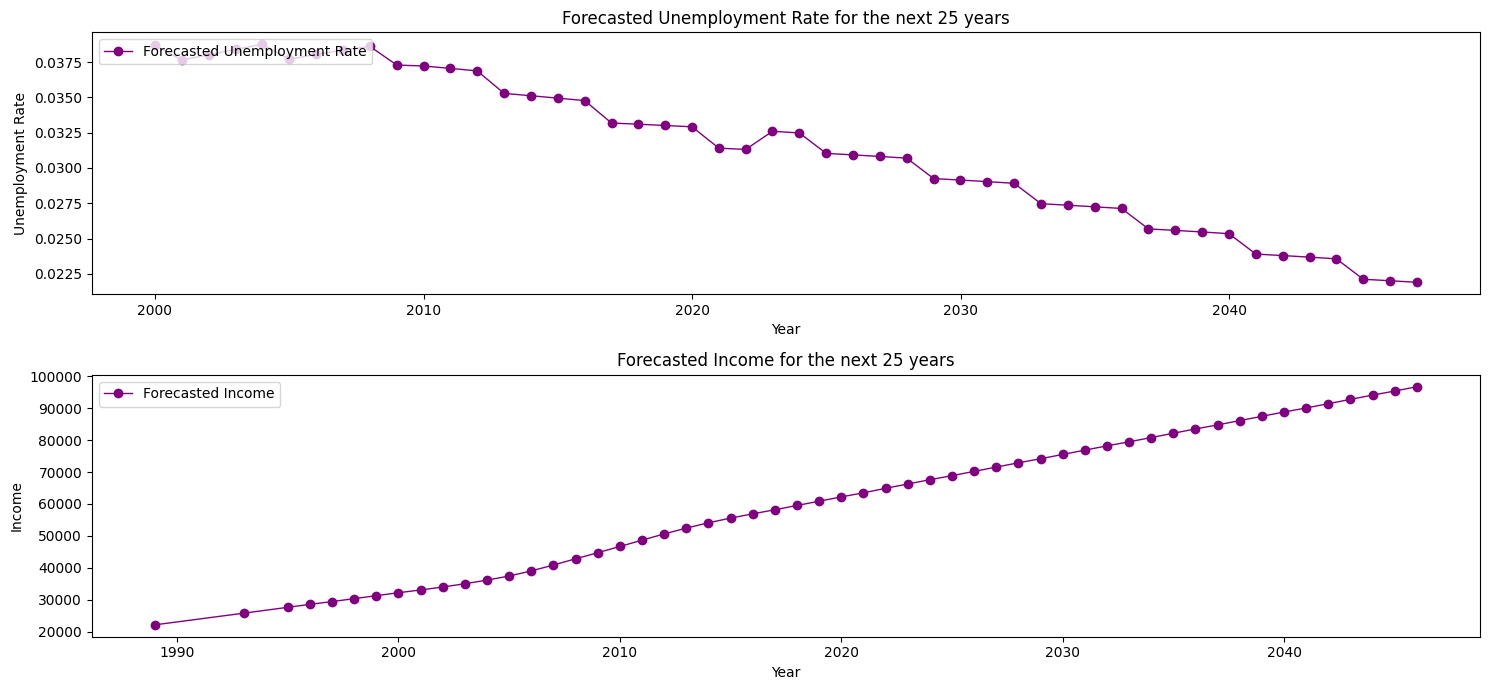

In [ ]:
# Plot the forecasted values for unemployment rate and income
plt.figure(figsize=(15, 7))

# Plot forecasted unemployment rate
plt.subplot(2, 1, 1)
plt.plot(forecast_unemployment['ds'], forecast_unemployment['yhat'], color='purple', linestyle='-', marker='o', linewidth=1, label='Forecasted Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Forecasted Unemployment Rate for the next 25 years')
plt.legend(loc="upper left")

# Plot forecasted income
plt.subplot(2, 1, 2)
plt.plot(forecast_income['ds'], forecast_income['yhat'], color='purple', linestyle='-', marker='o', linewidth=1, label='Forecasted Income')
plt.xlabel('Year')
plt.ylabel('Income')
plt.title('Forecasted Income for the next 25 years')
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

This code performs data merging between two datasets, 'aqi_smoke_df' and 'income_df', based on the columns 'Fire_Year' and 'TimeFrame'. After merging, it cleans the data by removing rows with NaN or infinite values in the selected columns ('smoke_estimate' and 'Data'). Then it replaces infinite values with NaN and drops those rows with NaN values in the specified columns.

In [ ]:
merged_data = pd.merge(aqi_smoke_df, income_df, how='inner', left_on='Fire_Year', right_on='TimeFrame')

# Remove rows with NaN or Inf values in the selected columns
merged_data = merged_data.dropna(subset=['smoke_estimate', 'Data'])

# Replace Inf values with NaN and then drop those rows
merged_data.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_data.dropna(subset=['smoke_estimate', 'Data'], inplace=True)

# Check the merged and cleaned dataset
print(merged_data.head())

# Now perform correlation calculation using the cleaned dataset
correlation_wildfires_income, _ = pearsonr(merged_data['smoke_estimate'], merged_data['Data'])
print(f"Correlation between wildfires (smoke estimate) and income: {correlation_wildfires_income}")

   Fire_Year  smoke_estimate        AQI LocationType      Location  TimeFrame  \
0       1989       16.206988  30.754795        State  North Dakota       1989   
1       1989       16.206988  30.754795       County         Adams       1989   
2       1989       16.206988  30.754795       County        Barnes       1989   
3       1989       16.206988  30.754795       County        Benson       1989   
4       1989       16.206988  30.754795       County      Billings       1989   

  DataFormat     Data  
0   Currency  23910.0  
1   Currency  20937.0  
2   Currency  20984.0  
3   Currency  16868.0  
4   Currency  28496.0  
Correlation between wildfires (smoke estimate) and income: 0.40678542771274906


In [ ]:
merged_data = pd.merge(aqi_smoke_df, unemployment_df, how='inner', left_on='Fire_Year', right_on='TimeFrame')

# Remove rows with NaN or Inf values in the selected columns
merged_data = merged_data.dropna(subset=['smoke_estimate', 'Data'])

# Replace Inf values with NaN and then drop those rows
merged_data.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_data.dropna(subset=['smoke_estimate', 'Data'], inplace=True)

# Check the merged and cleaned dataset
print(merged_data.head())

# Now perform correlation calculation using the cleaned dataset
correlation_wildfires_income, _ = pearsonr(merged_data['smoke_estimate'], merged_data['Data'])
print(f"Correlation between wildfires (smoke estimate) and unemployment: {correlation_wildfires_income}")

   Fire_Year  smoke_estimate        AQI LocationType      Location  TimeFrame  \
0       2000       31.288892  12.346995        State  North Dakota       2000   
1       2000       31.288892  12.346995       County         Adams       2000   
2       2000       31.288892  12.346995       County        Barnes       2000   
3       2000       31.288892  12.346995       County        Benson       2000   
4       2000       31.288892  12.346995       County      Billings       2000   

  DataFormat   Data  
0    Percent  0.030  
1    Percent  0.027  
2    Percent  0.032  
3    Percent  0.060  
4    Percent  0.025  
Correlation between wildfires (smoke estimate) and unemployment: 0.07111885885431161



This code focuses on forecasting smoke estimates using the 'Prophet' model. It selects the 'Fire_Year' and 'smoke_estimate' columns, renaming them as 'ds' and 'y' respectively. After setting a maximum estimate of 30, it prepares data for future predictions, setting a cap on maximum smoke estimates. Finally, it generates a 25-year forecast using the Prophet model.

In [ ]:
smoke_final = aqi_smoke_df[['Fire_Year', 'smoke_estimate']]

smoke_pred = smoke_final.rename(columns={'Fire_Year': 'ds', 'smoke_estimate': 'y'})

# Convert 'ds' to datetime format if not already in that format
smoke_pred['ds'] = pd.to_datetime(smoke_pred['ds'], format='%Y')

# Initialize and fit the Prophet model
model = Prophet(changepoint_prior_scale=0.05, yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False, growth='linear')
smoke_pred['cap'] = 30  # Assuming a maximum smoke estimate of 30 (adjust as needed)
model.fit(smoke_pred)

# Create a DataFrame with future years for prediction (25 years into the future)
future = model.make_future_dataframe(periods=25, freq='Y')
future['cap'] = 30  # Assuming a maximum smoke estimate of 30 (adjust as needed)

# Generate the forecast
forecast = model.predict(future)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ln68vh6/3bq_28tf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ln68vh6/v1_y3ed9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71497', 'data', 'file=/tmp/tmp8ln68vh6/3bq_28tf.json', 'init=/tmp/tmp8ln68vh6/v1_y3ed9.json', 'output', 'file=/tmp/tmp8ln68vh6/prophet_modelhempp4pg/prophet_model-20231201021918.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:19:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:19:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_forecast = forecast[['ds','yhat']]
future_forecast.tail(62)

,ds,yhat
3,1984-01-01,28.153125
4,1985-01-01,17.441147
5,1986-01-01,20.950579
6,1987-01-01,24.865617
7,1988-01-01,29.181829
...,...,...
60,2040-12-31,47.267224
61,2041-12-31,52.369656
62,2042-12-31,57.855740
63,2043-12-31,63.718256


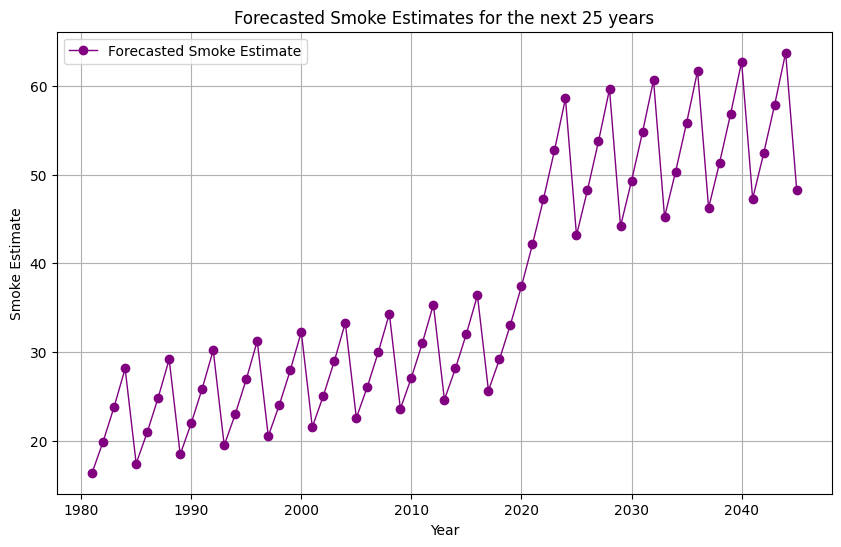

In [ ]:
# Assuming 'forecast_smoke' contains the forecasted smoke estimates from the Prophet model

plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], color='purple', linestyle='-', marker='o', linewidth=1, label='Forecasted Smoke Estimate')
plt.xlabel('Year')
plt.ylabel('Smoke Estimate')
plt.title('Forecasted Smoke Estimates for the next 25 years')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


The code plots the forecasted smoke estimates and income data on the same graph. The smoke estimates are shown on the primary y-axis, while the income data is displayed on a secondary y-axis with a different scale. It sets different limits for each y-axis to ensure clear visualization of both datasets. The graph visualizes the relationship between smoke estimates and income forecasts over time.

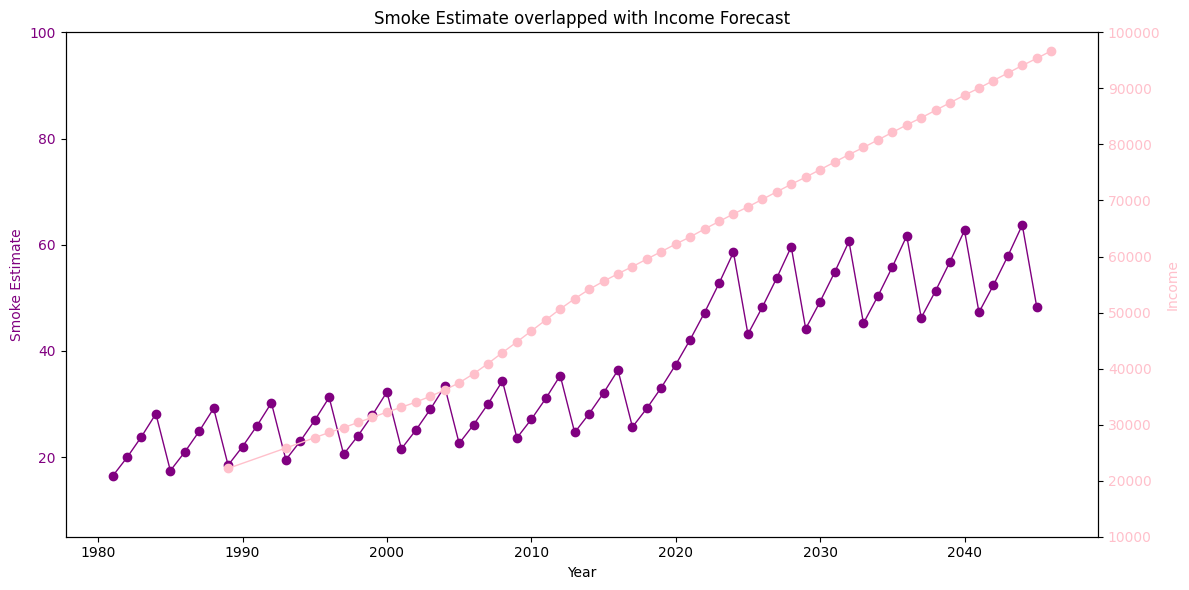

In [ ]:
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot forecasted smoke estimates on primary y-axis
ax1.plot(forecast['ds'], forecast['yhat'], color='purple', linestyle='-', marker='o', linewidth=1, label='Smoke Estimate')
ax1.set_xlabel('Year')
ax1.set_ylabel('Smoke Estimate', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

# Create a secondary y-axis for income with a different scale
ax2 = ax1.twinx()
ax2.plot(forecast_income['ds'], forecast_income['yhat'], color='pink', linestyle='-', marker='o', linewidth=1, label='Income')
ax2.set_ylabel('Income', color='pink')
ax2.tick_params(axis='y', labelcolor='pink')

# Set different scales for the y-axes
ax1.set_ylim(5, 100)  # Adjust the limits for smoke estimate scale (e.g., from 0 to 20)
ax2.set_ylim(10000, 100000)  # Adjust the limits for income scale (e.g., from 0 to 20000)

plt.title('Smoke Estimate overlapped with Income Forecast')
fig.tight_layout()
plt.show()

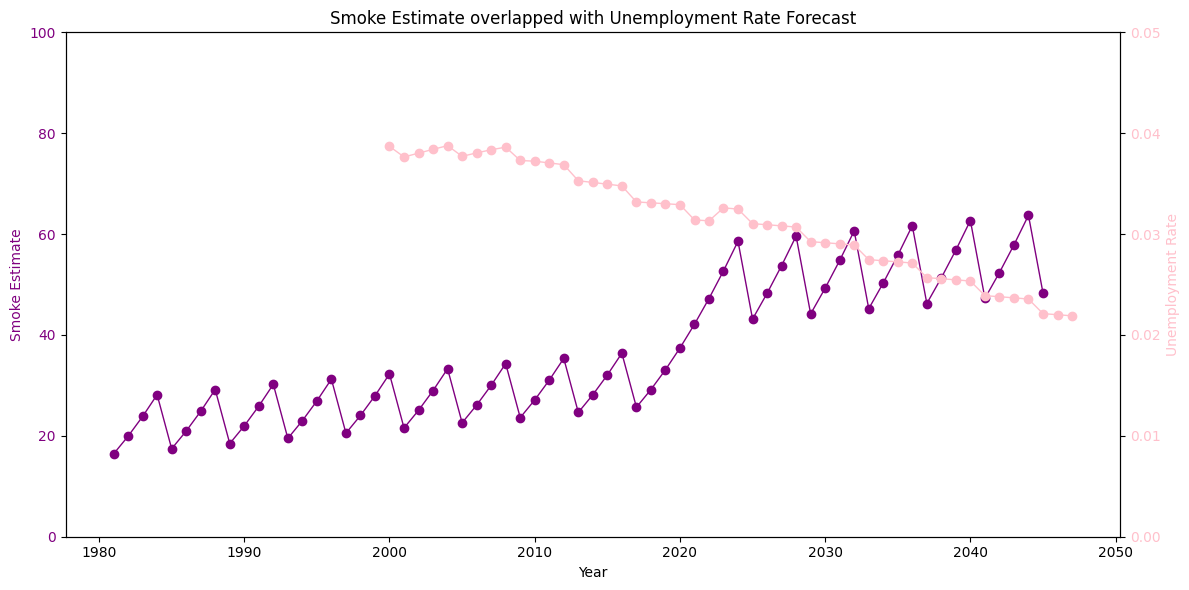

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'forecast_unemployment' contains unemployment rate predictions and 'forecast_smoke' contains smoke estimate predictions

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot forecasted smoke estimates on primary y-axis
ax1.plot(forecast['ds'], forecast['yhat'], color='purple', linestyle='-', marker='o', linewidth=1, label='Smoke Estimate')
ax1.set_xlabel('Year')
ax1.set_ylabel('Smoke Estimate', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

# Create a secondary y-axis for unemployment rate with a different scale
ax2 = ax1.twinx()
ax2.plot(forecast_unemployment['ds'], forecast_unemployment['yhat'], color='pink', linestyle='-', marker='o', linewidth=1, label='Unemployment Rate')
ax2.set_ylabel('Unemployment Rate', color='pink')
ax2.tick_params(axis='y', labelcolor='pink')

# Set different scales for the y-axes
ax1.set_ylim(0, 100)  # Adjust the limits for smoke estimate scale (e.g., from 0 to 20)
ax2.set_ylim(0, 0.05)  # Adjust the limits for unemployment rate scale (e.g., from 0 to 0.2)

plt.title('Smoke Estimate overlapped with Unemployment Rate Forecast')
fig.tight_layout()
plt.show()



The code creates a heatmap using Seaborn and Matplotlib libraries to visualize a correlation matrix.


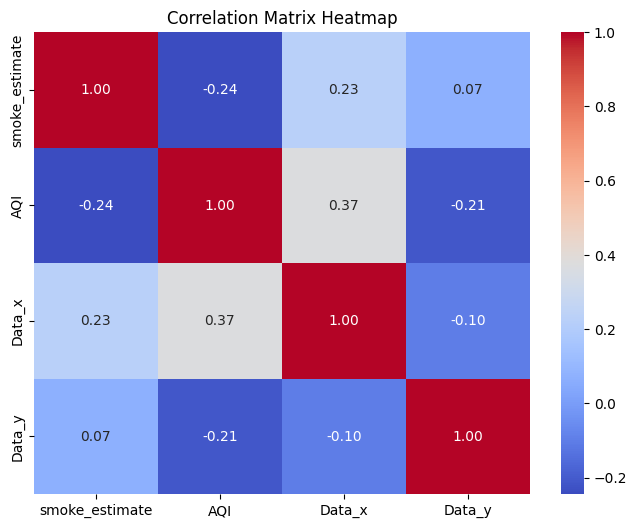

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()